# Wine
## Introduction of problem

We propose a data mining approach to predict human wine taste preferences that is based on easily available analytical tests at the certification step. A large dataset is considered, with white and red wine samples. Four Classification techniques were applied, under a computationally efficient procedure that performs simultaneous variable and model selection. Such model is useful to support the wine tasting evaluations and improve wine production.

This information taken from:-  https://archive.ics.uci.edu/ml/datasets/wine+quality



## Attributes Variables
### Input variables :
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol
### Output variable :
12 - quality (score between 0 and 8) (we consider 0-6 Bad Quality wine and 7-8 Good Quality wine)

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

### Data collection

In [2]:
# Loading the dataset to a Pandas DataFrame

wine=pd.read_csv(r"C:\Users\ADMIN\Downloads\Datasets\Wine\winequality-red.csv")

In [3]:
# Number of rows & columns in the dataset

wine.shape

(1599, 12)

In [4]:
# The first 5 rows of dataset

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# The last 5 rows of dataset

wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
# Checking for missing values

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values

In [7]:
# Removing the space between columns name by Underscore(_) for renaming the columns

wine.rename(columns={"fixed acidity":"fixed_acidity",
            "volatile acidity":"volatile_acidity",
            "citric acid":"citric_acid",
            "residual sugar":"residual_sugar",
            "free sulfur dioxide":"free_sulfur_dioxide",
            "total sulfur dioxide":"total_sulfur_dioxide"},inplace=True)

In [8]:
# First 5 rows of dataset

wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


There are no space between columns name.

## Data Analysis and Visualization

In [9]:
# Statistical measures of the Dataset

wine.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


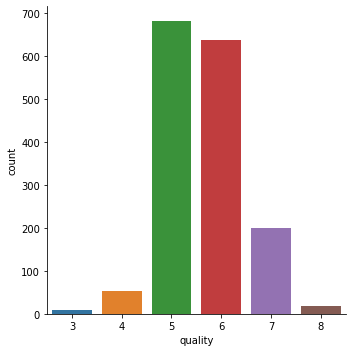

In [10]:
# Number of values for each quality

sns.catplot(x='quality',data=wine,kind='count')
plt.show()

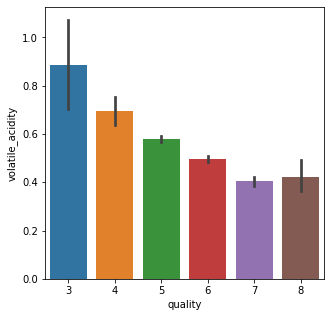

In [11]:
# Volatile acidity vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile_acidity', data=wine)
plt.show()

In this barplot, we can see the value of the volatile_acidity is high then the quality of wine will be low.
Or, the value of the volatile_acidity is low then the quality of wine will be High.

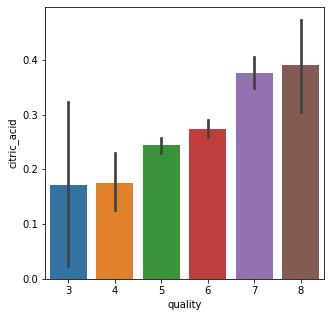

In [12]:
# citric acid vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric_acid', data=wine)
plt.show()

In this barplot, we can see the value of the citric_acid is high then the quality of wine will also high or value of citric acid is low then the quality of wine is low.

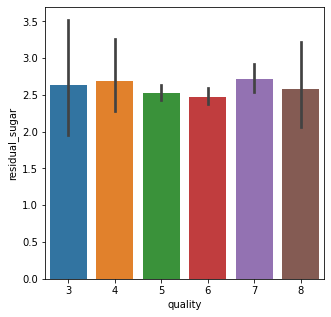

In [13]:
# residal sugar vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual_sugar', data=wine)
plt.show()

In this barplot we can see the quality is not depend on residual sugar.

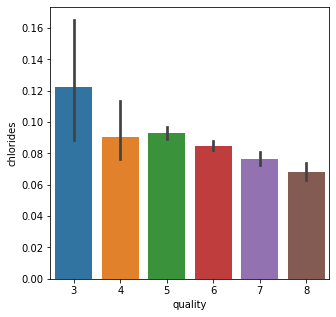

In [14]:
# chlorides vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides', data=wine)
plt.show()

In this bar plot we can see the value of the chlorides are gradually decrease when the quality of wine is increase.

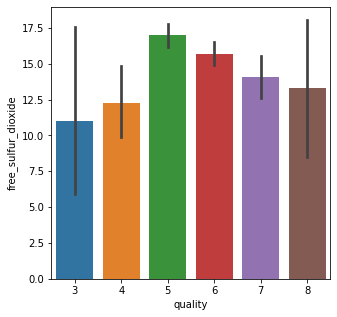

In [15]:
# free sulfur dioxide sugar vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free_sulfur_dioxide', data=wine)
plt.show()

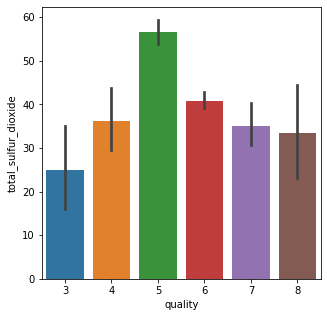

In [16]:
# total sulfur dioxide sugar vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total_sulfur_dioxide', data=wine)
plt.show()

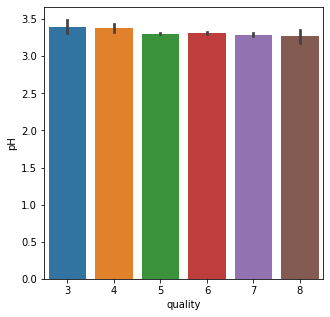

In [17]:
# pH sugar vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH', data=wine)
plt.show()

In this barplot we can see the pH value of each quality of wine almost same.

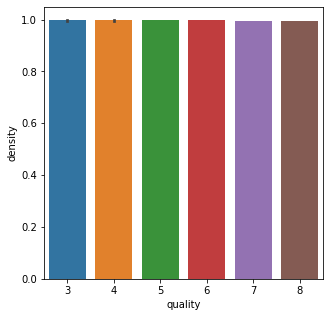

In [18]:
# density sugar vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density', data=wine)
plt.show()

In this barplot we can see the density value of each quality of wine same.

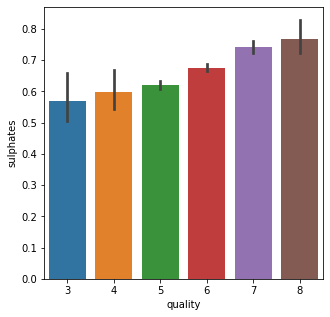

In [19]:
# sulphates sugar vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates', data=wine)
plt.show()

In this barplot, we can see the value of the sulphates is increase then the quality of wine will also increase.

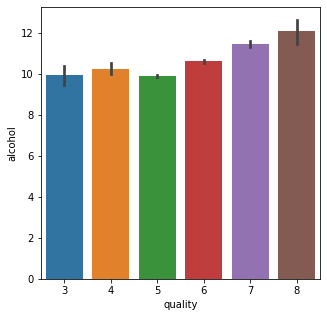

In [20]:
# alcohol sugar vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol', data=wine)
plt.show()

In this barplot, we can see when quantity of alcohol is increase then the quality of wine slightly increase.

## Check for Outliers

We Will Check Outliers using Distribution and Box plot for each Columns.

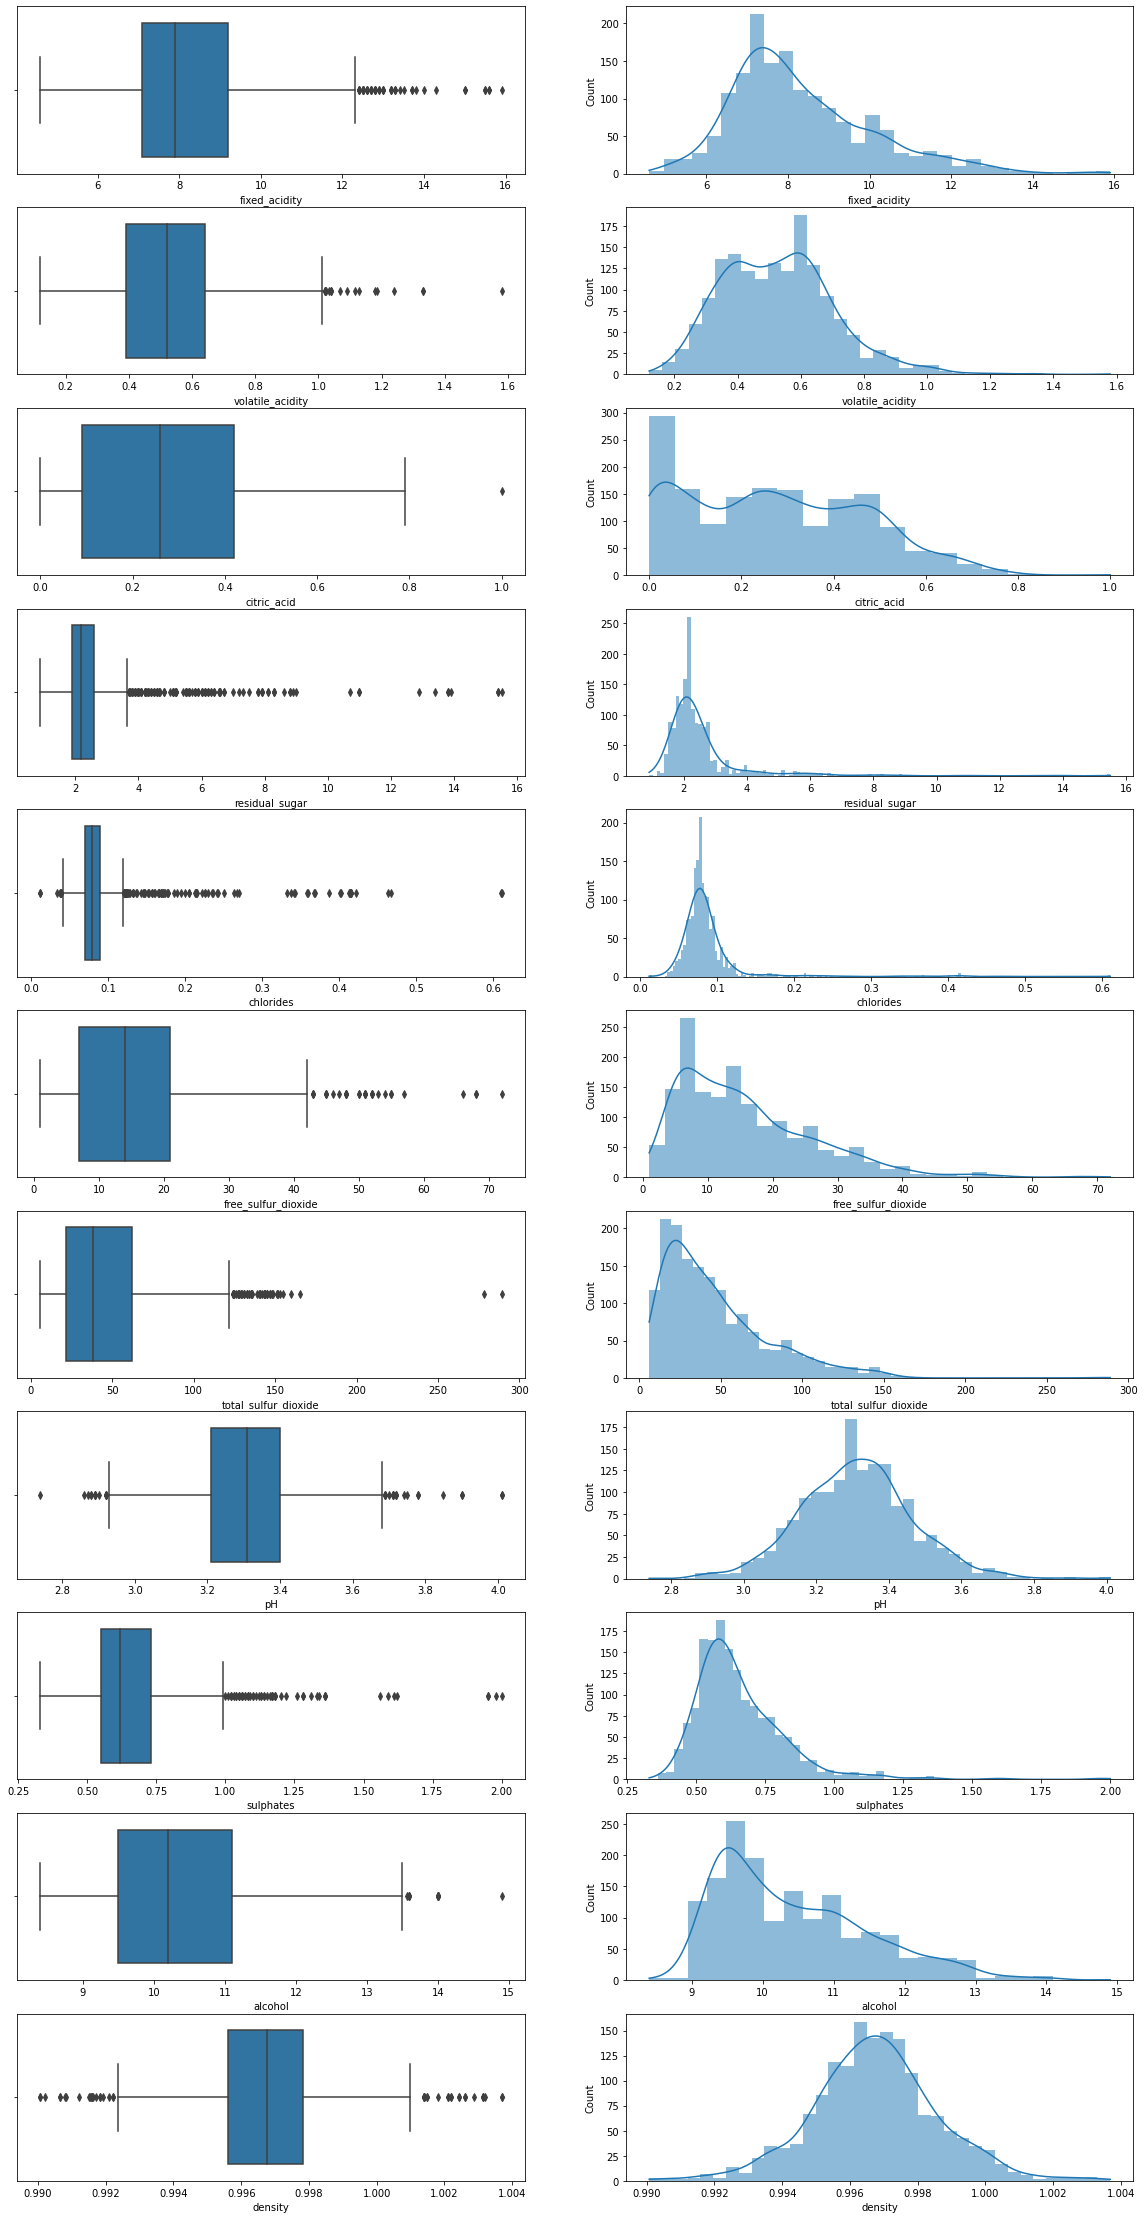

In [21]:
plt.figure(figsize=(20,40))
plt.subplot(11,2,1)
sns.boxplot(x='fixed_acidity',data=wine)
plt.subplot(11,2,2)
sns.histplot(wine.fixed_acidity, kde= True,  linewidth= 0)

plt.subplot(11,2,3)
sns.boxplot(x='volatile_acidity',data=wine)
plt.subplot(11,2,4)
sns.histplot(wine.volatile_acidity, kde= True,  linewidth= 0)

plt.subplot(11,2,5)
sns.boxplot(x='citric_acid',data=wine)
plt.subplot(11,2,6)
sns.histplot(wine.citric_acid, kde= True,  linewidth= 0)

plt.subplot(11,2,7)
sns.boxplot(x='residual_sugar',data=wine)
plt.subplot(11,2,8)
sns.histplot(wine.residual_sugar, kde= True,  linewidth= 0)

plt.subplot(11,2,9)
sns.boxplot(x='chlorides',data=wine)
plt.subplot(11,2,10)
sns.histplot(wine.chlorides, kde= True,  linewidth= 0)

plt.subplot(11,2,11)
sns.boxplot(x='free_sulfur_dioxide',data=wine)
plt.subplot(11,2,12)
sns.histplot(wine.free_sulfur_dioxide, kde= True,  linewidth= 0)

plt.subplot(11,2,13)
sns.boxplot(x='total_sulfur_dioxide',data=wine)
plt.subplot(11,2,14)
sns.histplot(wine.total_sulfur_dioxide, kde= True,  linewidth= 0)

plt.subplot(11,2,15)
sns.boxplot(x='pH',data=wine)
plt.subplot(11,2,16)
sns.histplot(wine.pH, kde= True,  linewidth= 0)

plt.subplot(11,2,17)
sns.boxplot(x='sulphates',data=wine)
plt.subplot(11,2,18)
sns.histplot(wine.sulphates, kde= True,  linewidth= 0)

plt.subplot(11,2,19)
sns.boxplot(x='alcohol',data=wine)
plt.subplot(11,2,20)
sns.histplot(wine.alcohol, kde= True,  linewidth= 0)

plt.subplot(11,2,21)
sns.boxplot(x='density',data=wine)
plt.subplot(11,2,22)
sns.histplot(wine.density, kde= True,  linewidth= 0)

plt.show()

 All the columns are having outliers.

 fixed_acidity, volatile_acidity, citric_acid, residual sugar, free_sulfur_dioxide, total_sulfur_dioxide, sulphates, alcohol, chlorides are having right skewed.

 Density, pH, having bell curved.

## Treating Outliers

As seen earlier fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality, were having outliers. We will remove the outliers using inter quartile range.

### Defining function

In [22]:
def treat_outlier(x):
    # Taking 25,75 percentile of column
    percentile25= np.percentile(x,25)
    percentile75 = np.percentile(x,75)

    # Calculating IQR range
    IQR=percentile75 - percentile25

    # Calculating minimum threshold
    lower_limit = percentile25-1.5*IQR

    # Calculating maximum threshold
    upper_limit = percentile75+1.5*IQR

    # Capping Outliers
    return x.apply(lambda y: upper_limit if y > upper_limit else y).apply(lambda y: lower_limit if y < lower_limit else y)


In [23]:
wine_cleaned = wine
req_col = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
for i in req_col:
    wine_cleaned[i]=treat_outlier(wine_cleaned[i])
wine_cleaned.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Checking for outliers after fixing

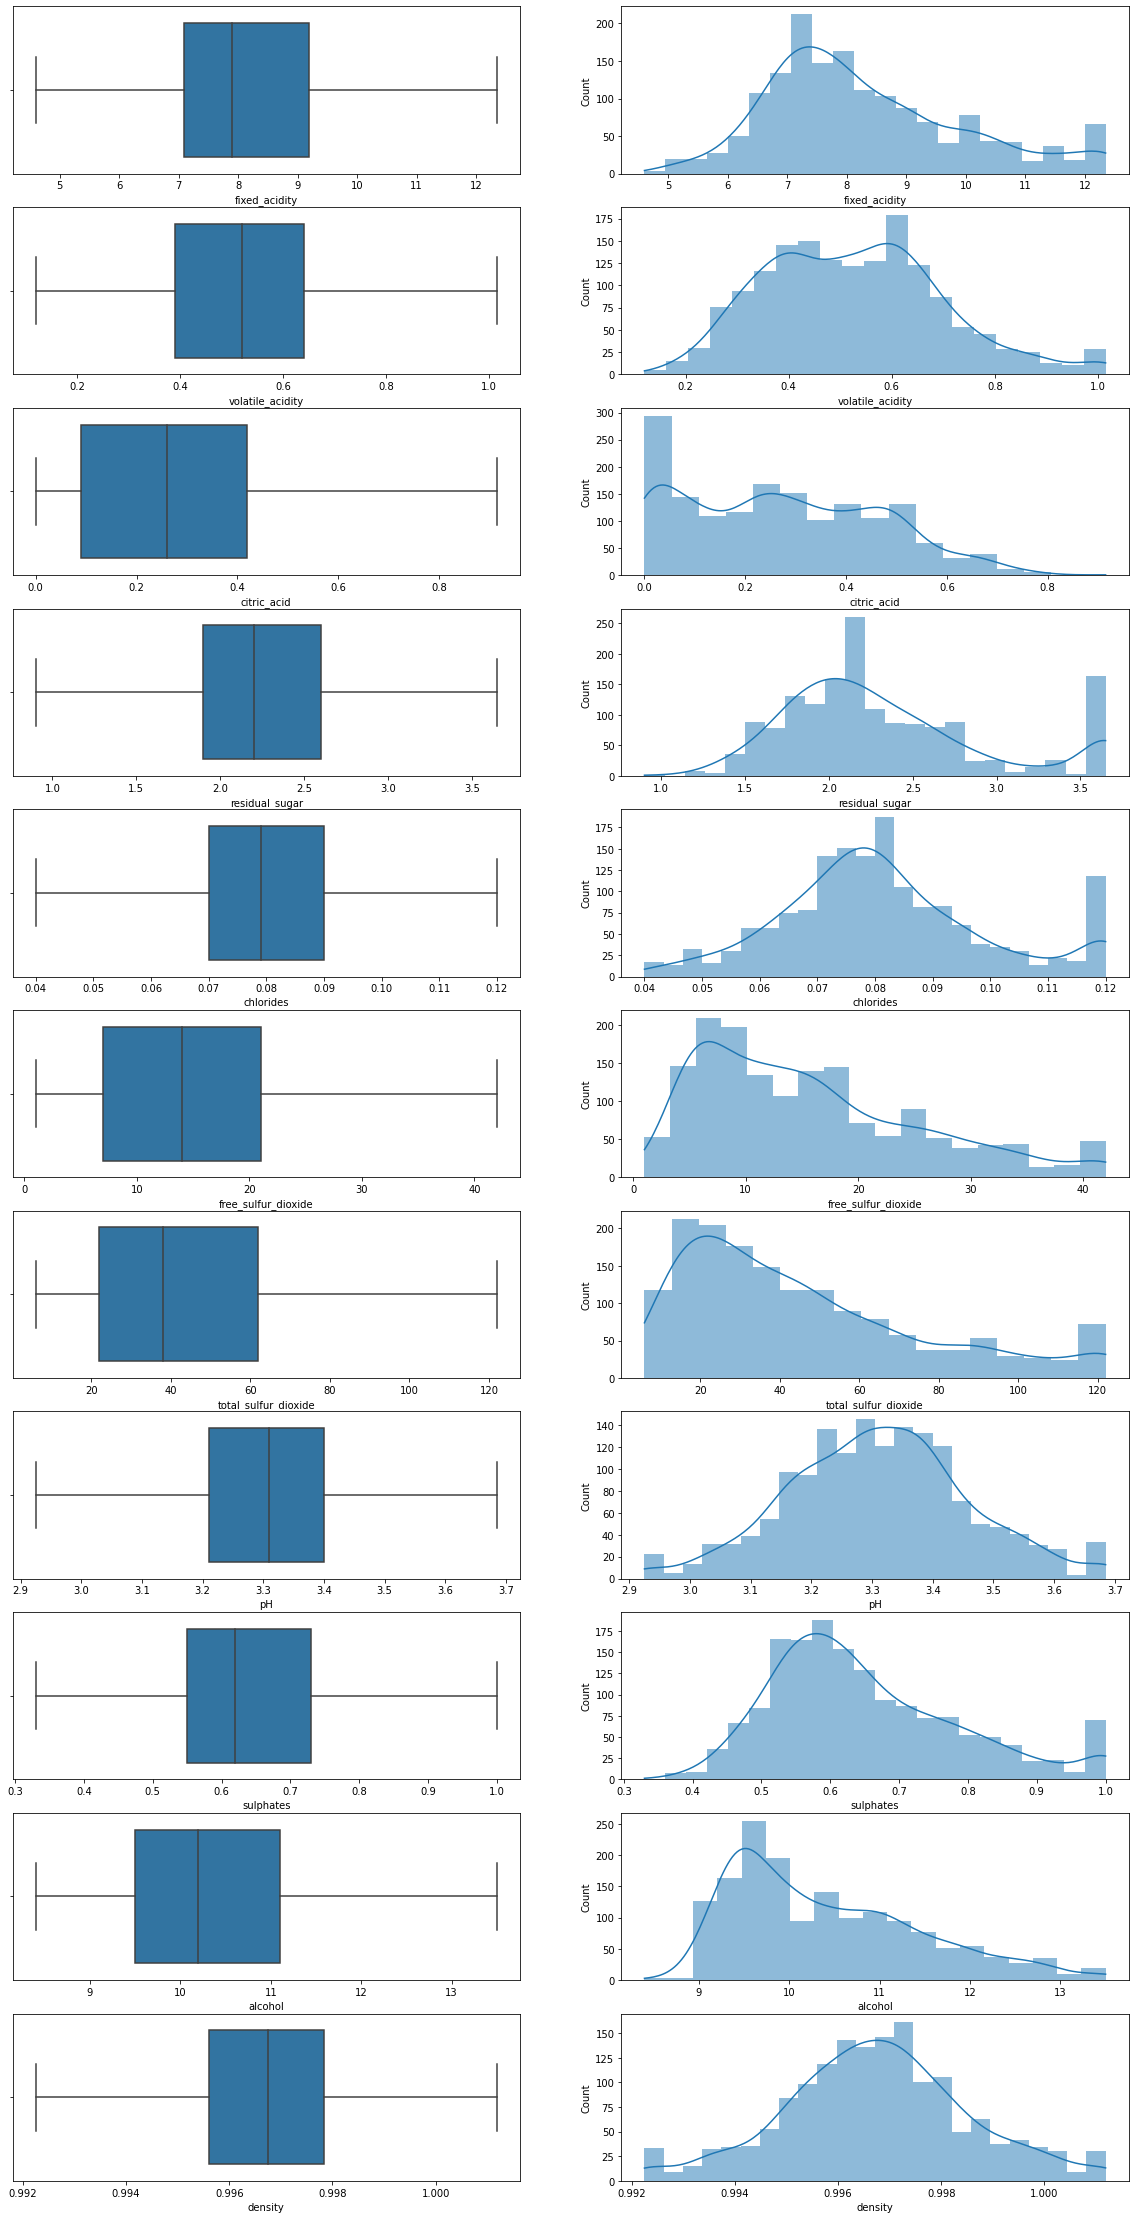

In [24]:
plt.figure(figsize=(20,40))
plt.subplot(11,2,1)
sns.boxplot(x='fixed_acidity',data=wine_cleaned)
plt.subplot(11,2,2)
sns.histplot(wine_cleaned.fixed_acidity, kde= True,  linewidth= 0)

plt.subplot(11,2,3)
sns.boxplot(x='volatile_acidity',data=wine_cleaned)
plt.subplot(11,2,4)
sns.histplot(wine_cleaned.volatile_acidity, kde= True,  linewidth= 0)

plt.subplot(11,2,5)
sns.boxplot(x='citric_acid',data=wine_cleaned)
plt.subplot(11,2,6)
sns.histplot(wine_cleaned.citric_acid, kde= True,  linewidth= 0)

plt.subplot(11,2,7)
sns.boxplot(x='residual_sugar',data=wine_cleaned)
plt.subplot(11,2,8)
sns.histplot(wine_cleaned.residual_sugar, kde= True,  linewidth= 0)

plt.subplot(11,2,9)
sns.boxplot(x='chlorides',data=wine_cleaned)
plt.subplot(11,2,10)
sns.histplot(wine_cleaned.chlorides, kde= True,  linewidth= 0)

plt.subplot(11,2,11)
sns.boxplot(x='free_sulfur_dioxide',data=wine_cleaned)
plt.subplot(11,2,12)
sns.histplot(wine_cleaned.free_sulfur_dioxide, kde= True,  linewidth= 0)

plt.subplot(11,2,13)
sns.boxplot(x='total_sulfur_dioxide',data=wine_cleaned)
plt.subplot(11,2,14)
sns.histplot(wine_cleaned.total_sulfur_dioxide, kde= True,  linewidth= 0)

plt.subplot(11,2,15)
sns.boxplot(x='pH',data=wine_cleaned)
plt.subplot(11,2,16)
sns.histplot(wine_cleaned.pH, kde= True,  linewidth= 0)

plt.subplot(11,2,17)
sns.boxplot(x='sulphates',data=wine_cleaned)
plt.subplot(11,2,18)
sns.histplot(wine_cleaned.sulphates, kde= True,  linewidth= 0)

plt.subplot(11,2,19)
sns.boxplot(x='alcohol',data=wine_cleaned)
plt.subplot(11,2,20)
sns.histplot(wine_cleaned.alcohol, kde= True,  linewidth= 0)


plt.subplot(11,2,21)
sns.boxplot(x='density',data=wine_cleaned)
plt.subplot(11,2,22)
sns.histplot(wine_cleaned.density, kde= True,  linewidth= 0)

plt.show()

Now there are no outliers

## Correlation
### 1. Positive Correlation
### 2. Negative Correlation

In [25]:
correlation=wine.corr()

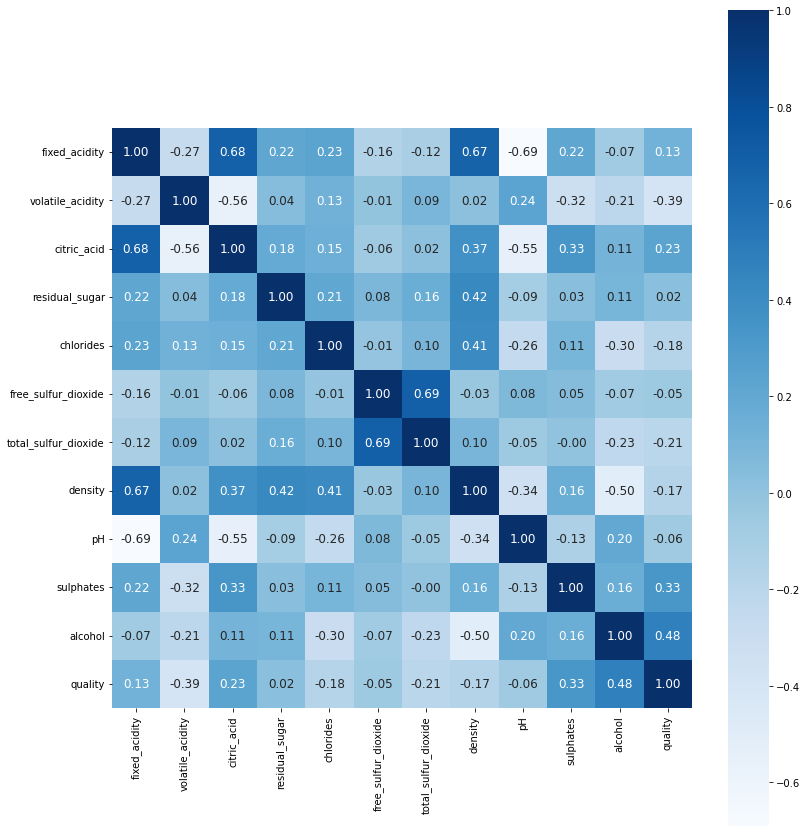

In [26]:
# constructing a heatmap to understand the correlaton between columns

plt.figure(figsize=(13,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':12}, cmap='Blues')
plt.show()

 There are good positive corellation between- 
1. citric_acid and fixed_acidity                                               
2. density and fixed acidity
3. total_ sulfur_dioxide and free_sulfur_dioxide
  
 There are good negative corellation between- 
1. citric_acid and volatile_acidity
2. pH and fixed_acidity
3. pH and citric_acid
4. alcohol and density

# Preprocessing

In [27]:
# Separate the data and label

X = wine_cleaned.drop('quality',axis=1)

### Label Binarization

we are convert multi class classification problem  into Binary class classification problem to check the quality of wine.

In [28]:
y = wine_cleaned['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [29]:
y.unique()

array([0, 1], dtype=int64)

In [30]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

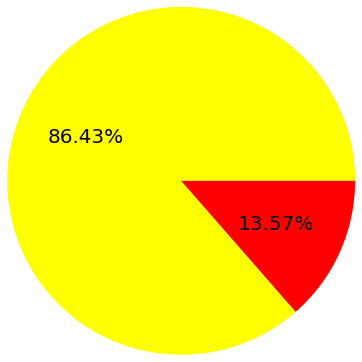

In [31]:
# Pie chart for checking the percentage of good and bad quality

plt.pie(y.value_counts(), autopct='%0.2f%%',radius=2,colors=["yellow","Red"],textprops=({'fontsize':20}))
plt.show()

## Train & Test Split

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1)

In [33]:
X.shape, X_train.shape, X_test.shape

((1599, 11), (1279, 11), (320, 11))

In [34]:
y.shape, y_train.shape, y_test.shape

((1599,), (1279,), (320,))

## Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [36]:
X_train= scalar.fit_transform(X_train)

In [37]:
X_test= scalar.transform(X_test)

# Model Training

## 1. K-Nearest Neighbor Classifier

In [38]:
knc= KNeighborsClassifier()

In [39]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
# Train data

y_train_pred1=knc.predict(X_train)

# accuracy on train data
print(accuracy_score(y_train_pred1,y_train))

0.9046129788897577


In [41]:
# Confusion matrix
print (confusion_matrix(y_train,y_train_pred1))

# Classification Report
print(classification_report(y_train,y_train_pred1))

[[1052   42]
 [  80  105]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1094
           1       0.71      0.57      0.63       185

    accuracy                           0.90      1279
   macro avg       0.82      0.76      0.79      1279
weighted avg       0.90      0.90      0.90      1279



In [42]:
# Test data
y_test_pred1=knc.predict(X_test)

# accuracy on test data
print (accuracy_score(y_test_pred1,y_test))

0.8875


In [43]:
# Confusion matrix
print (confusion_matrix(y_test,y_test_pred1))

# Classification Report
print(classification_report(y_test,y_test_pred1))

[[269  19]
 [ 17  15]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       288
           1       0.44      0.47      0.45        32

    accuracy                           0.89       320
   macro avg       0.69      0.70      0.70       320
weighted avg       0.89      0.89      0.89       320



KNeighbors accuracy Score of the Model for Train Data: 90.61%.

KNeighbors accuracy Score of the Model for Test Data: 87.81%.

## Hyperparameter tuning using Grid Search CV

In [44]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [45]:
grid_search.best_params_

{'n_neighbors': 1}

In [46]:
knn_best=grid_search.best_estimator_

In [47]:
knn_best

KNeighborsClassifier(n_neighbors=1)

#### Checking accuracy on train data with tuning

In [48]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 88.19%


#### Checking accuracy on test data with tuning

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

y_test_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 90.00%


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


#### Classification Report and Confusion matrix after Tuning for test data

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       288
           1       0.53      0.66      0.58        32

    accuracy                           0.91       320
   macro avg       0.74      0.80      0.77       320
weighted avg       0.92      0.91      0.91       320



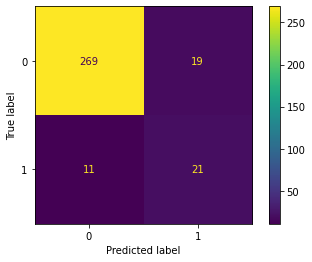

In [50]:
print(classification_report(y_test, knn_best.predict(X_test)))
plot_confusion_matrix(grid,X_test, y_test,values_format='d')
plt.show()

#### Classification Report and Confusion matrix after Tuning for training data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1094
           1       1.00      1.00      1.00       185

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


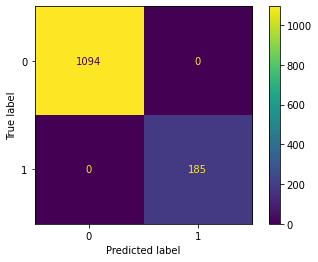

In [51]:
print(classification_report(y_train, knn_best.predict(X_train)))
plot_confusion_matrix(grid,X_train, y_train,values_format='d')
plt.show()

## 2. Decision Tree Classifier

In [52]:
dt=DecisionTreeClassifier(max_depth=3)

In [53]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

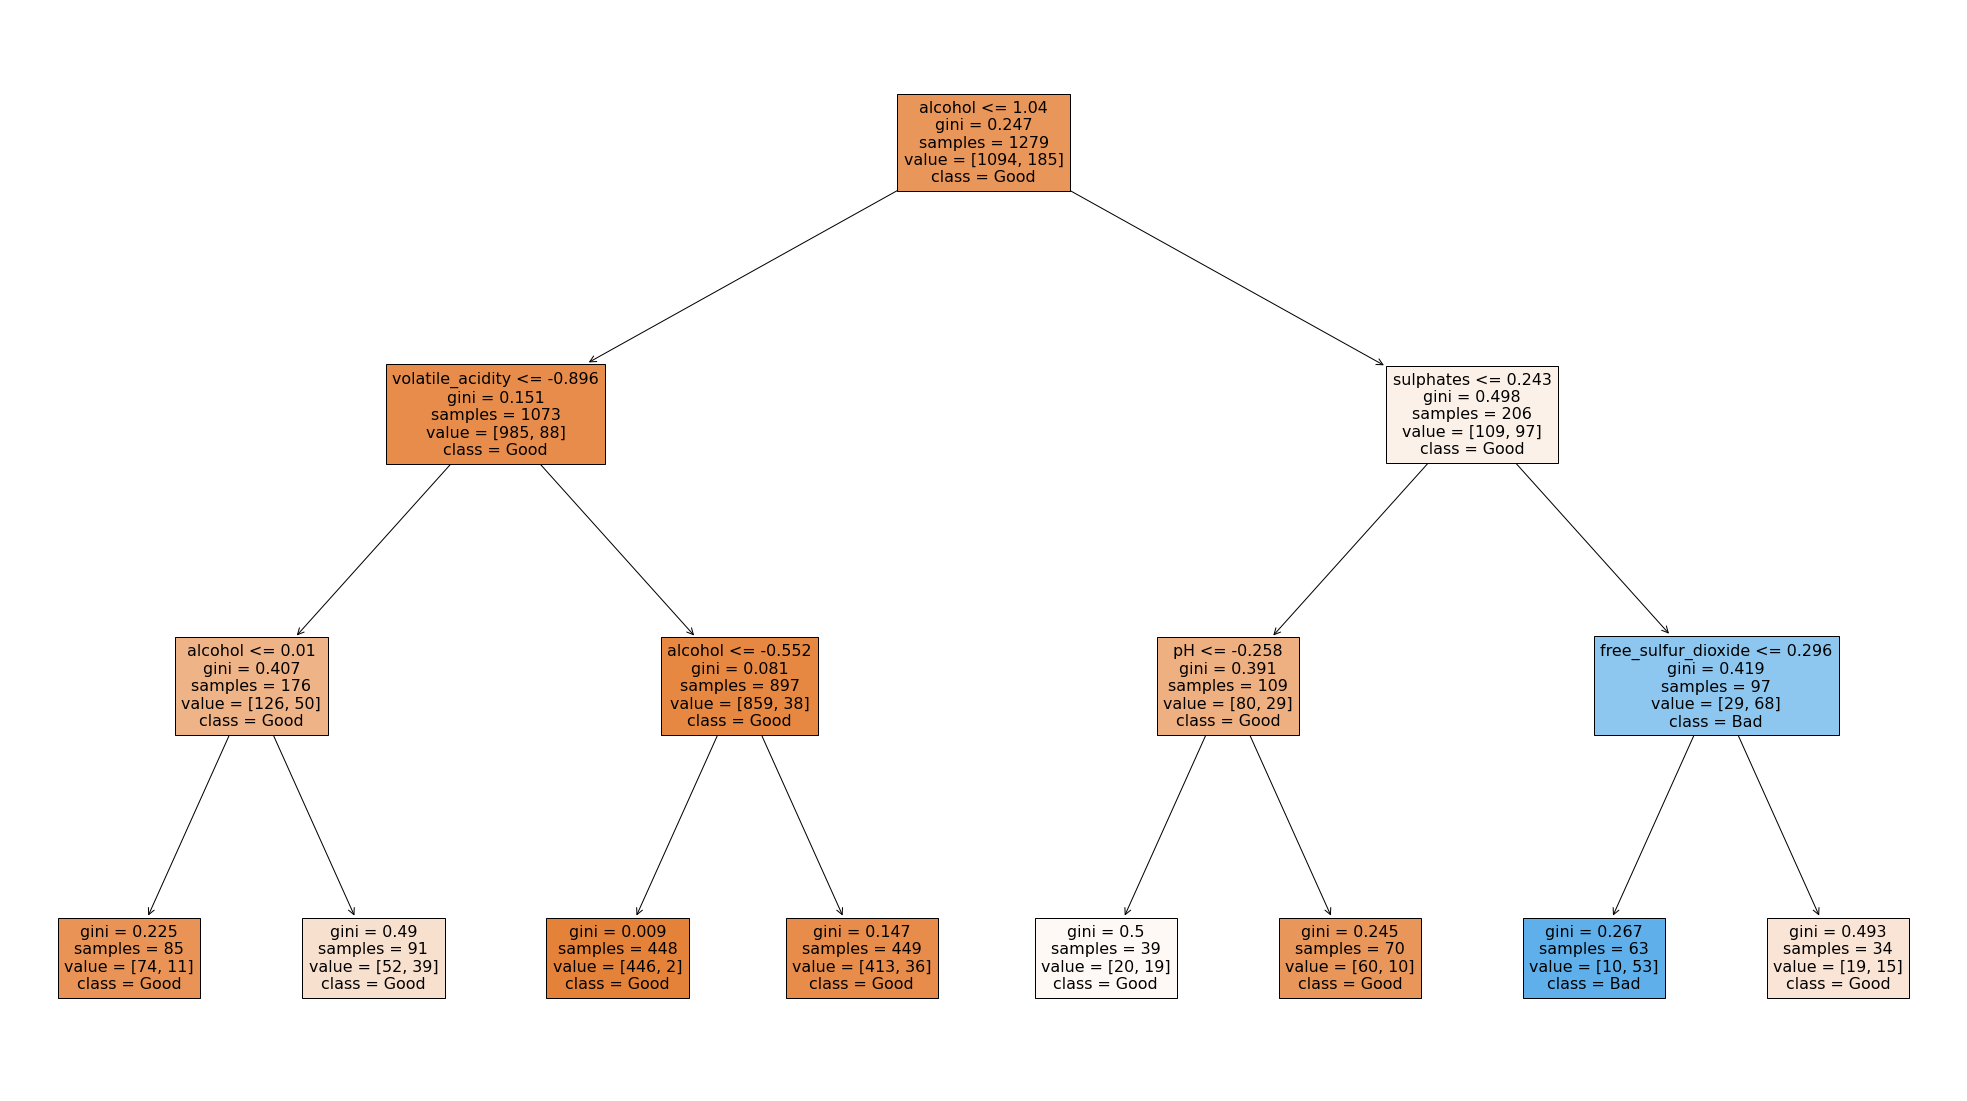

In [54]:
from sklearn import tree
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Good', "Bad"],
                   filled=True)

In [55]:
# Train data
y_train_pred2=dt.predict(X_train)

# accuracy on train data
print(accuracy_score(y_train_pred2,y_train))

#Confusion matrix
print (confusion_matrix(y_train,y_train_pred2))

0.8889757623143081
[[1084   10]
 [ 132   53]]


In [56]:
# Test data
y_test_pred2=dt.predict(X_test)

# accuracy on test data
print(accuracy_score(y_test_pred2,y_test))

#Confusion matrix
print (confusion_matrix(y_test,y_test_pred2))

0.9
[[282   6]
 [ 26   6]]


Decision tree accuracy Score of the Model for Train Data: 100%.

Decision tree accuracy Score of the Model for Test Data: 90.00%.

## Hyperparameter Tuning using Grid Search CV

In [57]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [58]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

In [59]:
%%time

# fitting the model for grid search
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Wall time: 3.84 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [60]:
# Best Estimators
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [61]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [62]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       288
           1       0.43      0.31      0.36        32

    accuracy                           0.89       320
   macro avg       0.68      0.63      0.65       320
weighted avg       0.88      0.89      0.88       320



## 3. Support Vector Machine classifier

In [63]:
svc=SVC()

In [64]:
svc.fit(X_train, y_train)

SVC()

In [65]:
# Train data
y_train_pred3=svc.predict(X_train)

# accuracy on train data
print(accuracy_score(y_train_pred3,y_train))

0.8983580922595777


In [66]:
# Confusion matrix
print (confusion_matrix(y_train,y_train_pred3))

# Classification Report
print(classification_report(y_train,y_train_pred3))

[[1076   18]
 [ 112   73]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1094
           1       0.80      0.39      0.53       185

    accuracy                           0.90      1279
   macro avg       0.85      0.69      0.74      1279
weighted avg       0.89      0.90      0.88      1279



In [67]:
# Test data
y_test_pred3=svc.predict(X_test)

# accuracy on test data
print(accuracy_score(y_test_pred3,y_test))

0.9


In [68]:
# Confusion matrix
print (confusion_matrix(y_test,y_test_pred3))

# Classification Report
print(classification_report(y_test,y_test_pred3))

[[281   7]
 [ 25   7]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       288
           1       0.50      0.22      0.30        32

    accuracy                           0.90       320
   macro avg       0.71      0.60      0.63       320
weighted avg       0.88      0.90      0.88       320



Support Vector Machine accuracy Score of the Model for Train Data: 86.86%.

Support Vector Machine accuracy Score of the Model for Test Data: 88.75%.

## Hyperparameter tuning using Grid Search CV

In [69]:
# defining parameter range

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly','linear']}

In [70]:
svc_grid = GridSearchCV(SVC(), param_grid, verbose = 2, n_jobs = -1, cv = 5)

In [71]:
# fitting the model for grid search
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [72]:
# best parameter after tuning
svc_grid.best_params_
  

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [73]:
# Best Estimator after tuning
svc_best = svc_grid.best_estimator_
svc_best

SVC(C=10, gamma=1)

In [74]:
print(classification_report(y_test, svc_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       288
           1       0.79      0.34      0.48        32

    accuracy                           0.93       320
   macro avg       0.86      0.67      0.72       320
weighted avg       0.92      0.93      0.91       320



Support vector machine classifier (SVM) does not directly provide probability estimates. so, to find probability possiblity for SVM we are use Caliberated Classifier.

In [75]:
# Import Calibrated Classifier

from sklearn.calibration import CalibratedClassifierCV

In [76]:
clf = CalibratedClassifierCV(svc)

In [77]:
clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC())

In [78]:
CalibratedClassifierCV(base_estimator=SVC)

CalibratedClassifierCV(base_estimator=<class 'sklearn.svm._classes.SVC'>)

## 4.Random Forest Classifier

In [79]:
rf=RandomForestClassifier()

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
# Train data
y_train_pred4=rf.predict(X_train)

# accuracy on train data
print(accuracy_score(y_train_pred4,y_train))

1.0


In [82]:
# Confusion matrix
print (confusion_matrix(y_train,y_train_pred4))

# Classification Report
print(classification_report(y_train,y_train_pred4))

[[1094    0]
 [   0  185]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1094
           1       1.00      1.00      1.00       185

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



In [83]:
# Test data
y_test_pred4=rf.predict(X_test)

# accuracy on test data
print(accuracy_score(y_test_pred4,y_test))

0.91875


In [84]:
# Confusion matrix
print (confusion_matrix(y_test,y_test_pred4))

# Classification Report
print(classification_report(y_test,y_test_pred4))

[[279   9]
 [ 17  15]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       288
           1       0.62      0.47      0.54        32

    accuracy                           0.92       320
   macro avg       0.78      0.72      0.75       320
weighted avg       0.91      0.92      0.91       320



Random Forest accuracy Score of the Model for Train Data: 100%.

Random Forest accuracy Score of the Model for Test Data: 93.43%.
 

## Hyperparameter tuning using Grid SearchCV

In [85]:
# Number of trees in random forest
n_estimators = [20,40,60,80,100]

# Number of features to consider every split
max_features = [0.2, 0.6, 1.0]

# Maximum number of levels in tree
max_depth = [2,6,8,None]

# Number of Samples
max_samples = [0.25,0.50,0.75,1.0]

In [86]:
# Form Dictionary

param_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'max_depth' : max_depth,
             'max_samples' : max_samples,
             }
print(param_grid)

{'n_estimators': [20, 40, 60, 80, 100], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 6, 8, None], 'max_samples': [0.25, 0.5, 0.75, 1.0]}


In [87]:
rf_grid=GridSearchCV(estimator=rf,
                    param_grid = param_grid,
                    cv = 10,
                    verbose = 2,
                    n_jobs = -1)

In [88]:
%%time

# fitting the model for grid search
rf_grid.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Wall time: 4min 44s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.25, 0.5, 0.75, 1.0],
                         'n_estimators': [20, 40, 60, 80, 100]},
             verbose=2)

In [89]:
# Best Parameters
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 80}

In [90]:
# Best Estimators
rf_best=rf_grid.best_estimator_
rf_best

RandomForestClassifier(max_features=0.6, max_samples=1.0, n_estimators=80)

In [91]:
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       288
           1       0.60      0.47      0.53        32

    accuracy                           0.92       320
   macro avg       0.77      0.72      0.74       320
weighted avg       0.91      0.92      0.91       320



## Receiving Operating Characterstic Curve (ROC) and Area Under the Curve (AUC)

### Prediction Probabilities

In [92]:
# Prediction Probability for Random Prediction
r_probs=[0 for _ in range(len(y_test))]

# Prediction Probabilities for models
knc_probs= knc.predict_proba(X_test)
dt_probs= dt.predict_proba(X_test)
svm_probs= clf.predict_proba(X_test)
rf_probs= rf.predict_proba(X_test)

In [93]:
# Probabilities for positive outcome

knc_probs = knc_probs[:, 1]
dt_probs = dt_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:,1]

### Calculate AUCROC

In [94]:
# AUCROC Score for Random Prediction
r_auc = roc_auc_score(y_test, r_probs)

#AUCROC Score for Random Prediction
knc_auc = roc_auc_score(y_test,knc_probs)
dt_auc = roc_auc_score(y_test,dt_probs)
svm_auc = roc_auc_score(y_test,svm_probs)
rf_auc = roc_auc_score(y_test,rf_probs)

### Print AUCROC Scores

In [95]:
#Print AUCROC Score for Random Prediction
print("Random Prediction: AUCROC = %.2f" %(r_auc))

# Print AUCROC Score for models
print("Kneighbor: AUCROC = %.2f" %(knc_auc))
print("Decision Tree: AUCROC = %.2f" %(dt_auc))
print("Support Vector Machine: AUCROC = %.2f" %(svm_auc))
print("Random Forest: AUCROC = %.2f" %(rf_auc))

Random Prediction: AUCROC = 0.50
Kneighbor: AUCROC = 0.85
Decision Tree: AUCROC = 0.80
Support Vector Machine: AUCROC = 0.86
Random Forest: AUCROC = 0.91


### Calculate ROC Curve

In [96]:
# ROC Curves for Random Prediction
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

# ROC Curves for all models
knc_fpr, knc_tpr, _ = roc_curve(y_test, knc_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr,_ = roc_curve(y_test, rf_probs)


### Plot ROC Curve

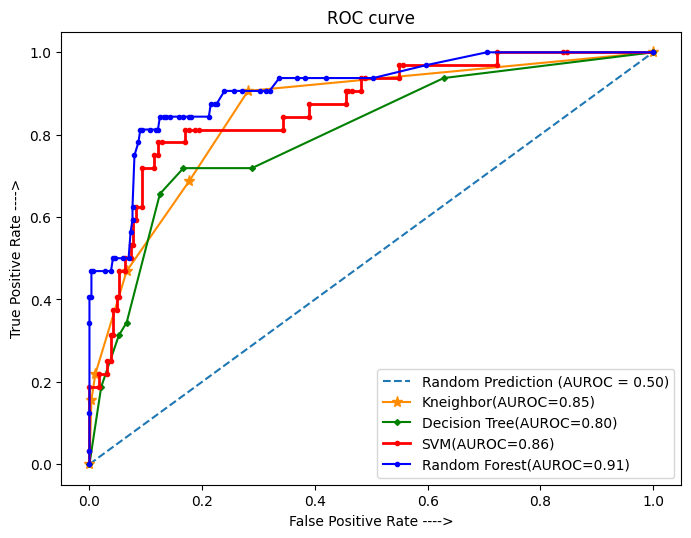

In [97]:
plt.figure(figsize=(8,6),dpi=100)

# Title
plt.title('ROC curve')

# Axis label
plt.xlabel('False Positive Rate ---->')
plt.ylabel('True Positive Rate ---->')

# Plot ROC Curves

plt.plot(r_fpr, r_tpr, ls="--", label="Random Prediction (AUROC = %0.2f)" % r_auc)

plt.plot(knc_fpr, knc_tpr, c="darkorange", label="Kneighbor(AUROC=%0.2f)" % knc_auc, marker="*",markersize=8)

plt.plot(dt_fpr, dt_tpr, c="green", label="Decision Tree(AUROC=%0.2f)" % dt_auc, marker="D", markersize=3)

plt.plot(svm_fpr, svm_tpr, c="red", label="SVM(AUROC=%0.2f)" % svm_auc, lw=2, marker="o", markersize=3)

plt.plot(rf_fpr, rf_tpr, c="blue", label="Random Forest(AUROC=%0.2f)" % rf_auc, marker="o", markersize=3)

plt.legend()
plt.show()

Random Forest provided the best performance it occupies the curve for left and the top and Area under the curve is essentialy above 0.90

## Building Predictive System

In [98]:

input_data=(7.3,0.80,0,1.2,0.096,15.0,21.0,0.9946,3.39,0.47,10.0)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [99]:
input_data_as_numpy_array

array([ 7.3   ,  0.8   ,  0.    ,  1.2   ,  0.096 , 15.    , 21.    ,
        0.9946,  3.39  ,  0.47  , 10.    ])

In [100]:
# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [101]:
input_data_reshaped

array([[ 7.3   ,  0.8   ,  0.    ,  1.2   ,  0.096 , 15.    , 21.    ,
         0.9946,  3.39  ,  0.47  , 10.    ]])

In [102]:
prediction = rf.predict(input_data_reshaped)

In [103]:
print(prediction)

if (prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality wine")

[0]
Bad Quality wine
